In [1]:
import tensorflow

In [2]:
tensorflow.__version__

'2.12.0'

In [31]:
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [4]:
## re-size all the images to this
IMAGE_SIZE = [224,224]
train_path = 'Car_brand_dataset/train'
valid_path = 'Car_brand_dataset/test'

In [5]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of ResNet50
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE+[3], weights = 'imagenet',include_top = False )
#[3] indicates RGB channel
# include_top=False--- in ResNet50 Stateof art algorithm they are having 1000 input categories
# but we doesnt have 1000 ,we are having 3 input categories(ie car brands) so we ignore first top layers
# we are using entire resnet50 algorithm exclude first and last layer,we are giving our own input and output layers

In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [7]:
# dont train exisiting weights
for layers in resnet.layers:
    layers.trainable = False

In [8]:
# useful for getting no, of o/p classes
folders = glob('Car_brand_dataset/train/*')
folders

['Car_brand_dataset/train\\audi',
 'Car_brand_dataset/train\\lamborghini',
 'Car_brand_dataset/train\\mercedes']

In [9]:
# we have to flatten the output layer
x = Flatten()(resnet.output)

In [10]:
len(folders)

3

In [11]:
prediction= Dense(len(folders),activation = 'softmax')(x)
#create a model object
model = Model(inputs = resnet.input,outputs = prediction)

In [12]:
# view the structure ofn the model
model.summary()
# see the last node having 3 output nodes

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [13]:
# tell the model of what cost and optimization method to use
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [14]:
# now we are doing data orgumentation
# this is done by ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
# In test we cant do any data argumentation
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
#Make sure you provide the same target size as initialize for tghe image size
# Reading the data from folders
training_set = train_datagen.flow_from_directory('Car_brand_dataset/train',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Car_brand_dataset/test',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [17]:
# fit the model 
# Rum the cell . It will take some time to execute
r = model.fit_generator(training_set,
                        validation_data = test_set,
                       epochs = 30,
                       steps_per_epoch = len(training_set),
                       validation_steps=len(test_set))

C:\Users\HP\AppData\Local\Temp\ipykernel_13272\444883365.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_set,


Epoch 1/30
2/2 [==============================] - 16s 9s/step - loss: 8.3488 - accuracy: 0.2500 - val_loss: 9.2184 - val_accuracy: 0.3276
Epoch 2/30
2/2 [==============================] - 11s 8s/step - loss: 4.7569 - accuracy: 0.3750 - val_loss: 3.9499 - val_accuracy: 0.5172
Epoch 3/30
2/2 [==============================] - 11s 8s/step - loss: 4.8059 - accuracy: 0.3125 - val_loss: 4.5261 - val_accuracy: 0.1552
Epoch 4/30
2/2 [==============================] - 11s 8s/step - loss: 3.4170 - accuracy: 0.3438 - val_loss: 2.8467 - val_accuracy: 0.3276
Epoch 5/30
2/2 [==============================] - 11s 8s/step - loss: 2.7190 - accuracy: 0.3906 - val_loss: 1.7378 - val_accuracy: 0.4828
Epoch 6/30
2/2 [==============================] - 11s 8s/step - loss: 2.3710 - accuracy: 0.4531 - val_loss: 1.6631 - val_accuracy: 0.5690
Epoch 7/30
2/2 [==============================] - 11s 8s/step - loss: 1.4536 - accuracy: 0.5156 - val_loss: 2.6651 - val_accuracy: 0.1724
Epoch 8/30
2/2 [==================

In [18]:
# results are saved in list
r.history

{'loss': [8.348804473876953,
  4.756908416748047,
  4.805898666381836,
  3.416975498199463,
  2.7189841270446777,
  2.3709869384765625,
  1.4535988569259644,
  1.8138022422790527,
  1.4151699542999268,
  1.1389265060424805,
  0.9319521188735962,
  0.8955672979354858,
  0.7483667135238647,
  0.6978490352630615,
  0.5497329235076904,
  0.5123392939567566,
  0.47665804624557495,
  0.6199910640716553,
  0.47011566162109375,
  0.5061823129653931,
  0.3419340252876282,
  0.5409473776817322,
  0.45727425813674927,
  0.35888102650642395,
  0.41936224699020386,
  0.29882484674453735,
  0.4257432222366333,
  0.36804842948913574,
  0.28644394874572754,
  0.2868184447288513],
 'accuracy': [0.25,
  0.375,
  0.3125,
  0.34375,
  0.390625,
  0.453125,
  0.515625,
  0.421875,
  0.53125,
  0.546875,
  0.640625,
  0.59375,
  0.671875,
  0.703125,
  0.75,
  0.828125,
  0.796875,
  0.765625,
  0.796875,
  0.75,
  0.84375,
  0.765625,
  0.8125,
  0.875,
  0.796875,
  0.90625,
  0.78125,
  0.84375,
  0.875,

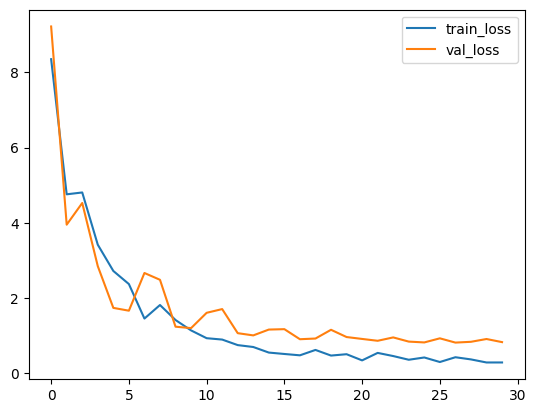

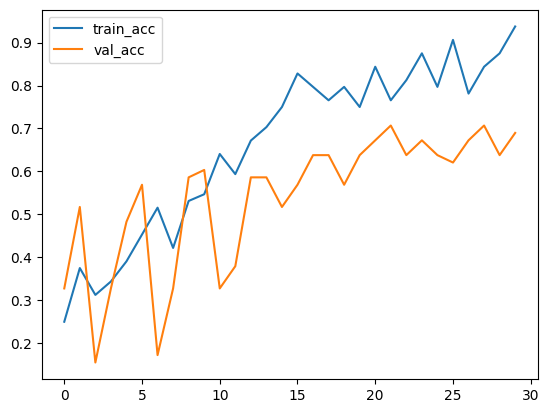

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot the loss
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('lossval_loss')

#plot the accuracy
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# Saveing the model
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [21]:
y_pred = model.predict(test_set)

2/2 [==============================] - 6s 2s/step


In [22]:
y_pred

array([[6.6076905e-01, 3.2102367e-01, 1.8207256e-02],
       [3.1747258e-01, 7.9752982e-02, 6.0277444e-01],
       [3.8713347e-02, 5.2327621e-01, 4.3801045e-01],
       [2.2469508e-02, 8.5856003e-01, 1.1897043e-01],
       [3.9093599e-02, 8.6152744e-01, 9.9378988e-02],
       [4.9423538e-02, 1.3388107e-02, 9.3718833e-01],
       [4.9161900e-02, 1.7286919e-01, 7.7796888e-01],
       [4.8348534e-01, 2.6326764e-01, 2.5324696e-01],
       [7.8951515e-02, 4.9808258e-01, 4.2296591e-01],
       [5.7978559e-02, 3.0963127e-02, 9.1105837e-01],
       [5.4364111e-02, 3.2282555e-01, 6.2281036e-01],
       [3.6664542e-02, 2.7012649e-01, 6.9320893e-01],
       [8.6745564e-03, 9.5255196e-01, 3.8773511e-02],
       [9.1590464e-02, 7.3317283e-01, 1.7523664e-01],
       [3.0388279e-02, 6.1099285e-01, 3.5861892e-01],
       [1.6856256e-01, 5.7689106e-01, 2.5454634e-01],
       [1.5982342e-01, 5.1383287e-01, 3.2634377e-01],
       [2.6342491e-02, 8.5021508e-01, 1.2344239e-01],
       [1.1761866e-01, 7.202

In [23]:
import numpy as np
y_pred = np.argmax(y_pred,axis =1)

In [24]:
y_pred

array([0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1], dtype=int64)

In [36]:
# we have predict for our new dataset
# for example
img=image.load_img('Car_brand_dataset/Test/lamborghini/11.jpg',target_size=(224,224))


In [37]:
# we have to convert it into array
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [38]:
x.shape

(224, 224, 3)

In [39]:
x=x/255

In [40]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[0.00197822, 0.01609257, 0.98192924]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 234ms/step


In [43]:
a==1

array([False])

In [ ]:
bnnnmm